# HW8 (60 points possible)

This homework also needs winequality-red.csv, which you can find at the same place you found this homework or at the UCI Machine Learning repository (https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/)

# Problem 1:  Scraping Rotten Tomatoes (24 points)

Rotten Tomatoes is a website that aggregates movie critic reviews.  Use the requests module to get the Rotten Tomatoes review site for *Star Wars:  A New Hope*, at URL https://www.rottentomatoes.com/m/star_wars_a_new_hope/reviews?intcmp=rt-scorecard_tomatometer-reviews .  Then use Beautiful Soup to extract all div tags with a class of 'the_review'.  Use Beautiful Soup's get_text() method to remove the tags from these text snippets, and finally, use the TextBlob class to print a Sentiment for each sentence, separated from the sentence itself by '::'.

For example, the expected output for one review would be:  "Star Wars is the best science fiction film that’s come down the pike to date.::Sentiment(polarity=0.4222222222222222, subjectivity=0.29444444444444445)
And every good thing you’ve heard about it is true.::Sentiment(polarity=0.5249999999999999, subjectivity=0.625)"

In [ ]:
# TODO

# Import the libraries we need
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob

# Get the Rotten Tomatoes review site for Star Wars: A New Hope
url = 'https://www.rottentomatoes.com/m/star_wars_a_new_hope/reviews?intcmp=rt-scorecard_tomatometer-reviews'

# Use the requests module to get the Rotten Tomatoes review site for Star Wars: A New Hope
response = requests.get(url)

# Use Beautiful Soup to extract all div tags with a class of 'the_review'
soup = BeautifulSoup(response.text, 'html.parser')
reviews = soup.find_all('div', class_='the_review')

# Use Beautiful Soup's get_text() method to remove the tags from these text snippets
for review in reviews:
    print(review.get_text())
    print('::')
    # Use the TextBlob class to print a Sentiment for each sentence, separated from the sentence itself by '::'
    analysis = TextBlob(review.get_text())
    print(analysis.sentiment)
    print('')

# Problem 2:  Random Forests (27 points:  3,6,6,12)

For this exercise, we'll try using random forests to predict wine quality.  The dataset is from the UCI Machine Learning repository, and rates wines on a scale from 1 to 10.  To turn this into a binary classification problem, we are just interested in identifying wines with a quality score of 7 or more.

In [ ]:
from google.colab import files

uploaded = files.upload() # Upload winequality-red.csv

In [ ]:
import pandas as pd

df = pd.read_csv('winequality-red.csv', sep = ';')
df.head()

To help you, below we've turned the final column into a *target* vector and created a DataFrame *features* that consists of all the other columns.

In [9]:
target = df['quality'] >= 7
features = df.iloc[:,0:11]

a, 3 pts) Separate the features and target vector into training and testing data with scikit-learn's *train_test_split()* function.

In [10]:
# TODO

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 123, stratify = target)


b, 6 pts) Use the RandomForestClassifier of sklearn.ensemble to create a random forest with 200 trees.  Train on the training data with *fit()*, and test on the test data with *score()*.

In [11]:
# TODO

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200, random_state = 123)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.903125

c, 6 pts) Consult the classifier's feature_importances_ attribute.  What is the most important feature that the classifier is using to classify the wines?

In [12]:
# TODO

print(rf.feature_importances_)

[0.07545932 0.11577706 0.09506743 0.06917127 0.07281473 0.05944952
 0.07366557 0.09375483 0.06116593 0.12004518 0.16362917]


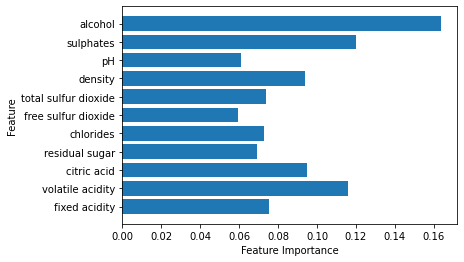

In [13]:
# Using a graphical way to solve this

import matplotlib.pyplot as plt

plt.barh(features.columns, rf.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


**TODO most important feature**

As we can see from the graph, 'alcohol' is the most important feature.

d, 12 points) Run an experiment in which you find the average test score over 100 trials for a scikit-learn decision tree classifier trained on the wine quality data.  Compare its performance to the average score over 100 trials of a random forest with *just one tree*.  What's one difference between these two classifiers that can explain the slight difference in average scores?

In [22]:
# TODO Decision Tree part of the experiment

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

scores = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = i, stratify = target)
    dt = DecisionTreeClassifier(random_state = i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

print('Average test score: {:.3f}'.format(sum(scores)/len(scores)))


Average test score: 0.874


In [15]:
# TODO Random Forest with one tree part of the experiment

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

scores = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = i, stratify = target)
    rf = RandomForestClassifier(n_estimators = 1, random_state = i)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

print('Average test score: {:.3f}'.format(sum(scores)/len(scores)))


Average test score: 0.857


**TODO explain the difference**

What can explain the difference of performance for these classifiers is that while a random forest classifier randomly chooses observations or rows and particular features or variables to build numerous decision trees from and then averages the results, a decision tree builds on a whole dataset utilizing all the features/variables of interest. The class that receives the most votes by a simple majority is the "winner" or predicted class when a large number of trees are constructed using this method.

# Problem 3:  Text Processing (9 points)

Write a function just_verbs() that takes a string as an argument, and returns a list of the verbs in the sentence.  (Note that the tags returned in the .tags attribute of a TextBlob start with 'VB' for verbs.)

In [16]:
from textblob import TextBlob
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# TODO just_verbs()

def just_verbs(text):
    blob = TextBlob(text)
    return [word for word, tag in blob.tags if tag.startswith('VB')]


In [18]:
# Test - should produce ['jumped', 'sang']

just_verbs('I jumped and sang')

['jumped', 'sang']

In [19]:
# Even more tests

print(just_verbs("Mary slapped the green witch."))
print(just_verbs("Peter told me that he would never do that again."))
print(just_verbs("I love to write Python programs."))

['slapped']
['told', 'do']
['love', 'write']
